<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/Deterministic_SEIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

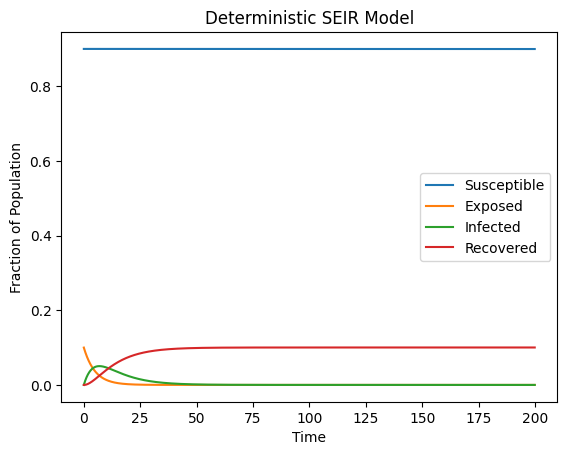

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.3   # Infection rate
gamma = 0.1  # Recovery rate
sigma = 0.2  # Incubation rate

# Initial number of individuals in each compartment
S0 = 0.9     # Susceptible
E0 = 0.1     # Exposed
I0 = 0.0     # Infected
R0 = 0.0     # Recovered

# Total population
N = 1000

# Time vector
t_max = 200
dt = 0.1
t = np.arange(0, t_max, dt)

# SEIR model function
def SEIR_model(S, E, I, R, beta, gamma, sigma):
    dS = -beta * S * I / N
    dE = beta * S * I / N - sigma * E
    dI = sigma * E - gamma * I
    dR = gamma * I
    return dS, dE, dI, dR

# Initialize arrays
S = np.zeros(len(t))
E = np.zeros(len(t))
I = np.zeros(len(t))
R = np.zeros(len(t))

S[0], E[0], I[0], R[0] = S0, E0, I0, R0

# Run simulation
for i in range(1, len(t)):
    dS, dE, dI, dR = SEIR_model(S[i-1], E[i-1], I[i-1], R[i-1], beta, gamma, sigma)
    S[i] = S[i-1] + dS * dt
    E[i] = E[i-1] + dE * dt
    I[i] = I[i-1] + dI * dt
    R[i] = R[i-1] + dR * dt

# Plot results
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('Deterministic SEIR Model')
plt.legend()
plt.show()
